In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
from matplotlib import pyplot as plt

import config
from dxlib.api import AlpacaMarketsAPI
# from dxlib.api import YFinanceAPI # Or any other API 
from dxlib import History

import pprint
pp = pprint.PrettyPrinter(width=100)

In [20]:
api = AlpacaMarketsAPI(config.alpaca_market_api_key, config.alpaca_market_api_secret)
# api = YFinanceAPI() # Or any other API 

In [21]:
historical_bars = api.get_historical_bars(["MSFT"], "2022-01-01")

In [22]:
historical_bars.head()

,Close,High,Low,NumTrades,Open,VWAP,Volume
Ticker,MSFT,MSFT,MSFT,MSFT,MSFT,MSFT,MSFT
Time,,,,,,,
2022-01-03 05:00:00,330.05,333.26,325.15,394908,330.65,328.70,28899988
2022-01-04 05:00:00,324.40,330.50,321.55,517781,330.13,324.83,32663003
2022-01-05 05:00:00,311.94,321.50,311.57,637313,321.29,315.56,39731813
2022-01-06 05:00:00,309.48,314.23,307.12,626724,308.76,310.79,39788894
2022-01-07 05:00:00,309.64,312.06,305.74,499166,309.74,309.38,32686013


<Axes: xlabel='Time'>

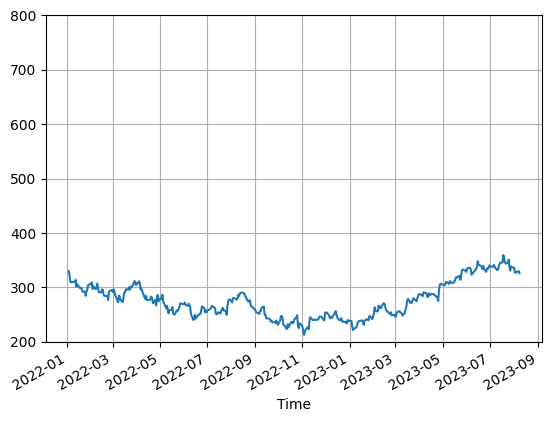

In [23]:
historical_bars.tail()
historical_bars["Close"]["MSFT"].plot(ylim=(200, 800), grid=True)

Log change description:
Ticker        MSFT
count   400.000000
mean     -0.000030
std       0.020715
min      -0.080314
25%      -0.012861
50%      -0.000652
75%       0.012724
max       0.079093
Sharpes ratio: Ticker
MSFT   -0.023361
dtype: float64


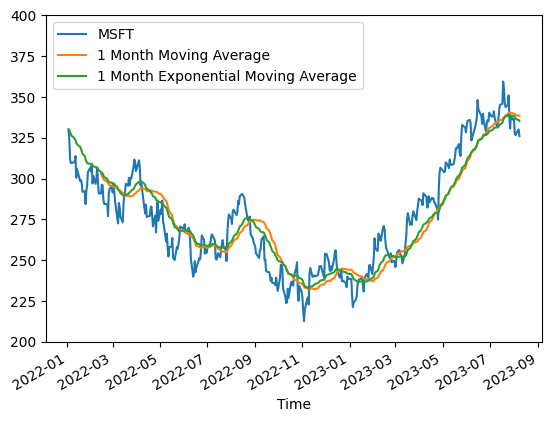

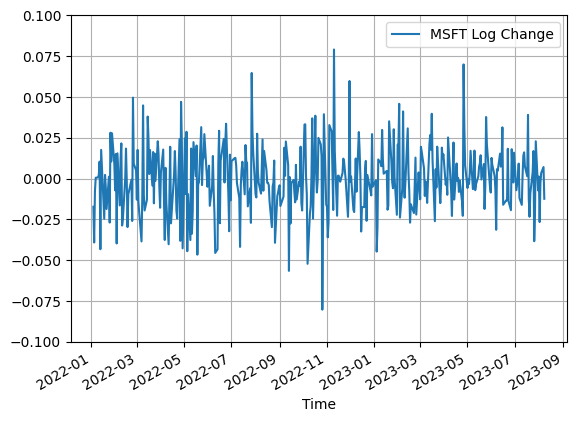

In [261]:
close_history = History(historical_bars["Close"])

ax = close_history.df.plot(ylim=(200, 400), grid=True)
close_history.moving_average(30).plot(ax=ax)
close_history.exponential_moving_average(30).plot(ax=ax)

plt.legend(["MSFT", "1 Month Moving Average", "1 Month Exponential Moving Average"])

log_change = close_history.log_change() 
log_change.plot(ylim=(-0.1, 0.1), grid=True)
plt.legend(["MSFT Log Change"])
print("Log change description:")
print(log_change.describe())
print("Sharpes ratio:", log_change.mean() / log_change.std() * 252 ** 0.5)

<Axes: title={'center': 'Drawdown'}, xlabel='Time'>

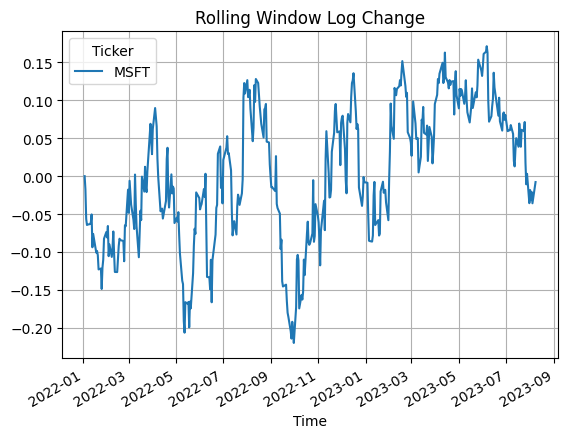

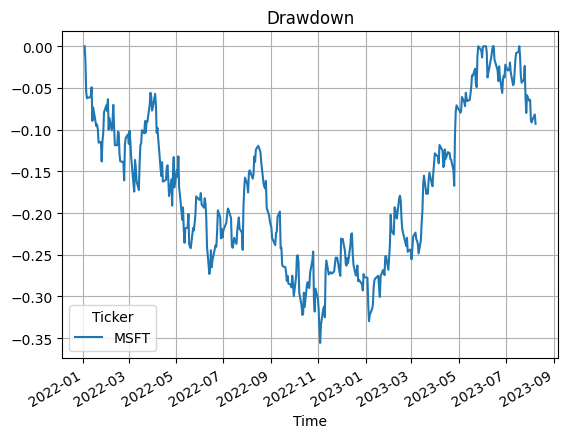

In [263]:
close_history.log_change(30, progressive=True).plot(title="Rolling Window Log Change", grid=True)

close_history.drawdown().plot(title="Drawdown", grid=True)

<Axes: xlabel='Time'>

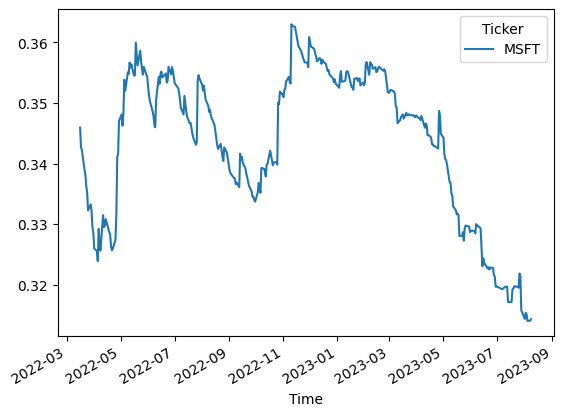

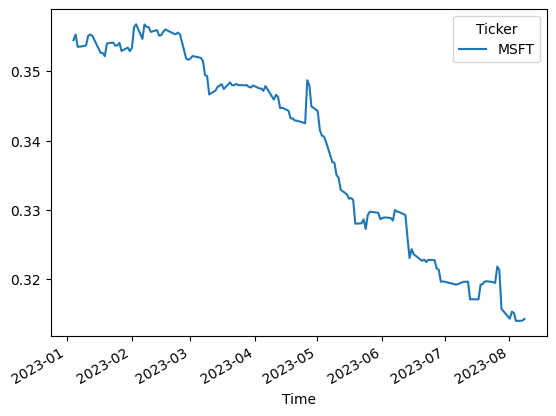

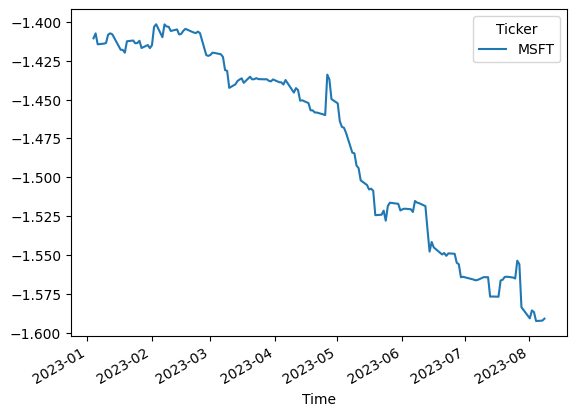

In [266]:
close_history.volatility(progressive=True, min_interval=50).plot()
close_history.volatility().plot()